# Copyright

<PRE>
This notebook was created as part of the "Deep learning / VITMMA19" class at
Budapest University of Technology and Economics, Hungary,
https://portal.vik.bme.hu/kepzes/targyak/VITMMA19.

Any re-use or publication of any part of the notebook is only allowed with the
written consent of the authors.

2023 (c) Dániel Unyi (unyi pont daniel kukac tmit pont bme pont hu)
</PRE>

# Classification example

This Jupyter Notebook contains a basic classification example using the heart disease dataset from the University of California, Irvine machine learning repository. We will preprocess the data, visualize it, and train three different classifiers: logistic regression, random forest, and a deep neural network. We will evaluate the performance of each classifier and compare the results. This notebook is intended to serve as a starting point for those who are new to classification problems and want to learn how to preprocess data, visualize it, and train different classifiers. The notebook showcases the modeling pipeline.


First, we install [Pytorch Lightning](https://lightning.ai/), which will be used as an easy-to-use interface to PyTorch.

In [1]:
!pip install -q pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 14.4 MB/s eta 0:00:00


## Data
See https://archive.ics.uci.edu/, a popular machine learning repository maintained by University of California, Irvine. We are working with their 2nd most popular dataset.

In [2]:
!wget -q http://archive.ics.uci.edu/static/public/45/heart+disease.zip
!unzip -q heart+disease.zip -d dataset

## Imports
Importing libraries for data preprocessing & visualization.
What are these 4 libraries good for?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing and visualisation

In [4]:
df = pd.read_csv('dataset/processed.cleveland.data', header=None, na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Get a general description of the DataFrame:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9       303 non-null    float64
 10  10      303 non-null    float64
 11  11      299 non-null    float64
 12  12      301 non-null    float64
 13  13      303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


Based on the website, we have the following columns/variables/features in our dataset:

In [6]:
columns = [
    'age', # the person's age in years
    'sex', # the person's sex (0 = female, 1 = male)
    'cp', # the chest pain experienced (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
    'trestbps', # the person's resting blood pressure in mm Hg
    'chol', # the person's cholesterol measurement in mg/dl
    'fbs', # the person's fasting blood sugar (> 120 mg/dl, 0 = false, 1 = true)
    'restecg', # resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
    'thalach', # the person's maximum heart rate achieved
    'exang', # exercise induces angina (0 = no, 1 = true)
    'oldpeak', # ST depression induced by exercise relative to rest
    'slope', # the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
    'ca', # the number of major vessels (0-3)
    'thal', # a blood disorder called thalassemia (3 = normal, 6 = fixed defect, 7 = reversable defect)
    'target', # heart disease (0 = no, 1,2,3,4 = yes, different types)
]

# the column types are defined by the dataset description
column_types = ['float32', 'int64', 'int64', 'float32', 'float32', 'int64', 'int64',
                'float32', 'int64', 'float32', 'int64', 'int64', 'int64', 'int64']


Now we name the columns, replace the 'NaN' values and convert the column types:

In [7]:
columns_dict = dict(zip(df.columns, columns))
columns_dict

{0: 'age',
 1: 'sex',
 2: 'cp',
 3: 'trestbps',
 4: 'chol',
 5: 'fbs',
 6: 'restecg',
 7: 'thalach',
 8: 'exang',
 9: 'oldpeak',
 10: 'slope',
 11: 'ca',
 12: 'thal',
 13: 'target'}

In [8]:
df.rename(columns=columns_dict, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


There are 'NaN' values in two categorical columns.
We replace these 'NaN' values with the most frequent value in the column.

In [10]:
mode_ca = df['ca'].mode().item()
df['ca'].fillna(mode_ca, inplace=True)
mode_thal = df['thal'].mode().item()
df['thal'].fillna(mode_thal, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [12]:
column_types_dict = dict(zip(df.columns, column_types))
column_types_dict

{'age': 'float32',
 'sex': 'int64',
 'cp': 'int64',
 'trestbps': 'float32',
 'chol': 'float32',
 'fbs': 'int64',
 'restecg': 'int64',
 'thalach': 'float32',
 'exang': 'int64',
 'oldpeak': 'float32',
 'slope': 'int64',
 'ca': 'int64',
 'thal': 'int64',
 'target': 'int64'}

In [13]:
df = df.astype(column_types_dict)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,2
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,3
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float32
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float32
 4   chol      303 non-null    float32
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float32
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float32
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float32(5), int64(9)
memory usage: 27.3 KB


Let's quickly check the number of samples in each class:

In [15]:
df['target'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: target, dtype: int64

For now, we are interested whether a person has heart disease or not,
so we won't classify the subtypes and change the target to binary.

In [16]:
df['target'] = df['target'].apply(lambda value: 1 if value > 0 else 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,1
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1


Let's quickly check the number of data points in each class again:

In [17]:
df['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

This code creates a scatter plot matrix using Seaborn's `pairplot()` function. The plot shows pairwise relationships between the numerical columns of the `df` dataframe. The `hue` parameter is set to the `target` column, which is used to color the points based on whether the person has heart disease or not.

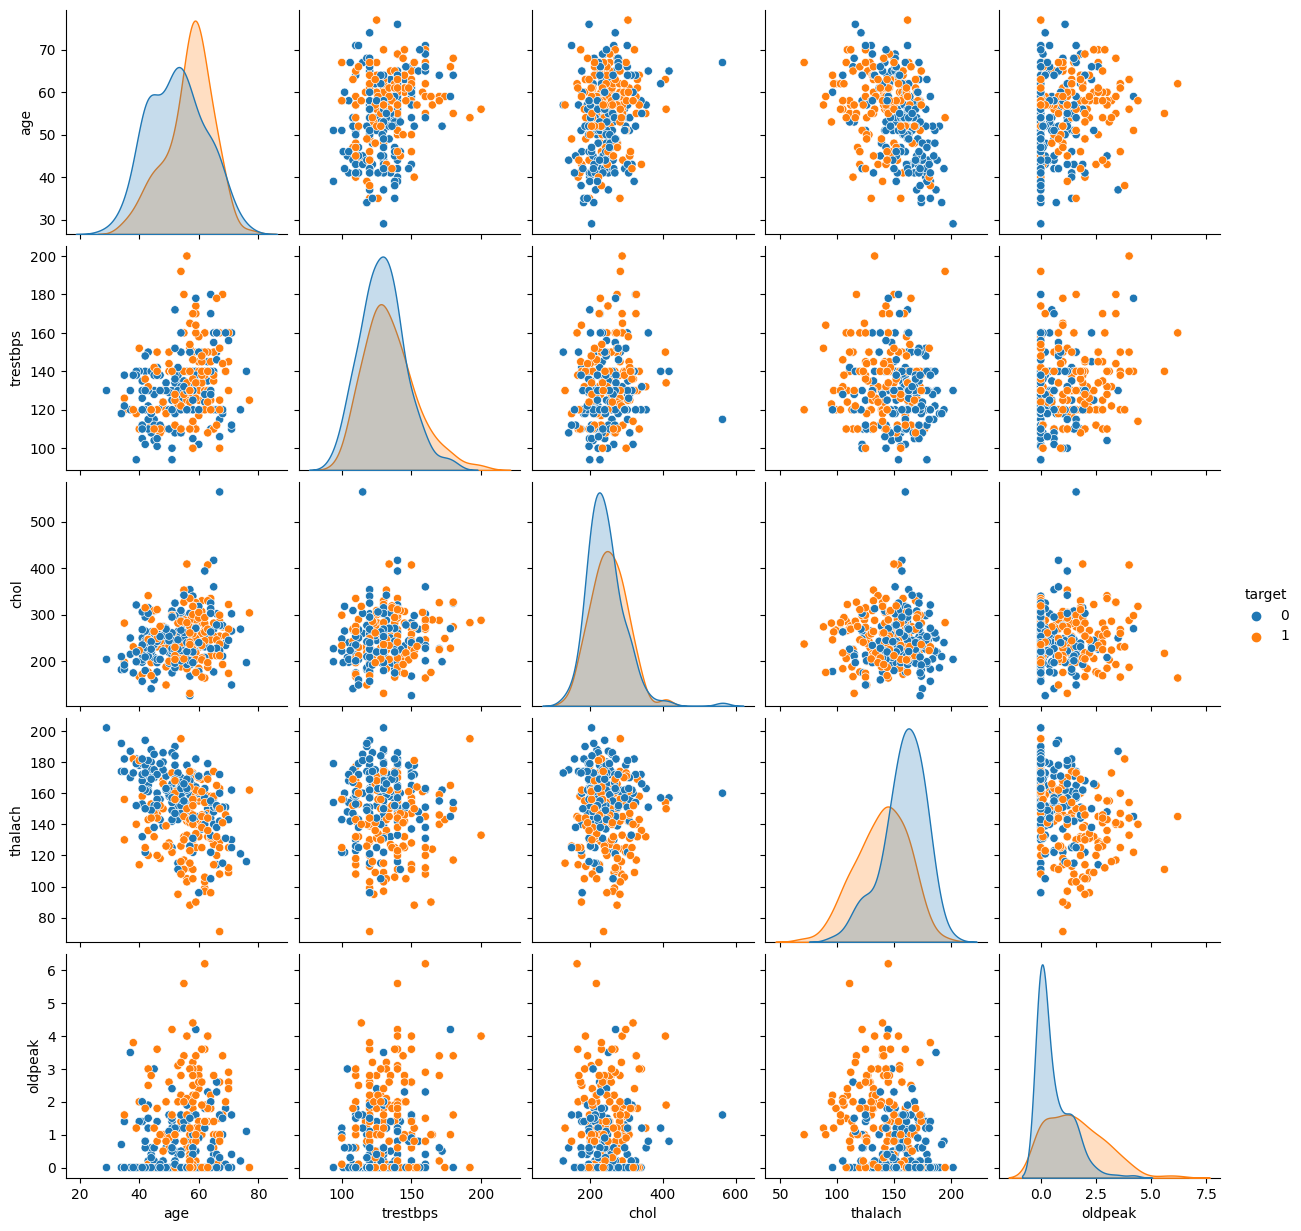

In [18]:
numerical_columns = df.select_dtypes(include=['float32'])
sns.pairplot(data=df, vars=numerical_columns, hue='target')
plt.show()

We see that the relationships are far from linear, and in each diagonal, there are significant overlaps between the two in-class distributions.

One-hot encoding, except the target variable:

In [19]:
categorical_columns = df.drop('target', axis=1).select_dtypes(include=['int64'])
df = pd.get_dummies(df, columns=categorical_columns.columns)
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,129.0,2.6,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,110.0,264.0,132.0,1.2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,141.0,3.4,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,115.0,1.2,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
301,57.0,130.0,236.0,174.0,0.0,1,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


This is our final dataframe that we will use for training and evaluation.

## Training logistic regression and random forest classifiers

First, we train baseline models to be able to compare the performance to these baselines. We split the features and the target variable:

In [20]:
X =  df.drop('target', axis=1).values # features
y = df['target'].values # label

In [21]:
np.info(X) # numpy array of shape (303, 28) and type float32

class:  ndarray
shape:  (303, 28)
strides:  (4, 1212)
itemsize:  4
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x57b2c5f0d1c0
byteorder:  little
byteswap:  False
type: float32


In [22]:
np.info(y) # numpy array of shape (303,) and type int64

class:  ndarray
shape:  (303,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x57b2c5f09620
byteorder:  little
byteswap:  False
type: int64


Now we split the dataset into train and test sets, train logistic regression and random forest classifiers on the train set, and evaluate them on the test set.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # alternative: min-max scaling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

for model in [LogisticRegression(), RandomForestClassifier()]:
  model.fit(scaler.transform(X_train), y_train)
  y_pred = model.predict(scaler.transform(X_test))
  np.save(model.__class__.__name__, y_pred)
  # we have to talk about these metrics:
  print(f'Classification report for {model.__class__.__name__}:\n\n', classification_report(y_test, y_pred))
  print(f'Confusion matrix for {model.__class__.__name__}:\n\n', confusion_matrix(y_test, y_pred))
  print('\n\n')

Classification report for LogisticRegression:

               precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix for LogisticRegression:

 [[23  6]
 [ 5 27]]



Classification report for RandomForestClassifier:

               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix for RandomForestClassifier:

 [[25  4]
 [ 6 26]]





## Training a Deep Neural Network Classifier
Now, we will train a deep neural network based classifier to predict whether a person has heart disease or not. We will use the preprocessed dataset that we created in the previous cells. We will start by importing the necessary libraries and defining the architecture of the deep neural network. Then, we will train the model and evaluate its performance.

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import pytorch_lightning as pl
import torchmetrics

We split the dataset into train, validation and test sets:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

We specify the hyperparameters:

In [26]:
batch_size = 64
epochs = 200
lr = 0.002
hidden_dim = 64

We create the data loaders:

In [27]:
def create_dataloader(X, y, batch_size):
  X = scaler.transform(X).astype('float32')
  X = torch.from_numpy(X)
  y = y.astype('float32')
  y = torch.from_numpy(y)
  dataset = TensorDataset(X, y)
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
  return dataloader

train_loader = create_dataloader(X_train, y_train, batch_size)
val_loader = create_dataloader(X_val, y_val, batch_size)
test_loader = create_dataloader(X_test, y_test, batch_size)

Now we are ready to define our DNN classifier using the LightningModule from PyTorch Lightning!

In [28]:
# base class is the LightningModule, on which we build our custom model:
# - initialization: __init__ and setup()
# - train loop: training_step()
# - validation loop: validation_step()
# - test loop: test_step()
# - prediction loop: predict_step() - by default, runs the forward() method
# - optimizers and LR schedulers: configure_optimizers()

class MyFeedForwardNet(pl.LightningModule):
    def __init__(self, num_features, hidden_dim, lr):
      super(MyFeedForwardNet, self).__init__()
      self.save_hyperparameters()
      self.lr = lr
      self.layers = nn.Sequential(
          # simple logistic regression
          # incremental modeling:
          # we extend this with linear layers, nonlinearities, and possibly other layers
          # number of parameters vs. number of data points
          nn.Linear(num_features, 1),
          nn.Sigmoid()
      )
      self.loss = nn.BCELoss()
      self.acc = torchmetrics.classification.BinaryAccuracy()

    # forward propagation
    def forward(self, x):
      return self.layers(x)

    # one step of training
    def training_step(self, batch, batch_idx):
      loss, acc = self._shared_eval_step(batch, batch_idx)
      metrics = {"acc": acc, "loss": loss}
      self.log_dict(metrics, prog_bar=True)
      return metrics

    # one step of validation
    def validation_step(self, batch, batch_idx):
      loss, acc = self._shared_eval_step(batch, batch_idx)
      metrics = {"val_acc": acc, "val_loss": loss}
      self.log_dict(metrics, prog_bar=True)
      return metrics

    # one step of test
    def test_step(self, batch, batch_idx):
      loss, acc = self._shared_eval_step(batch, batch_idx)
      metrics = {"test_acc": acc, "test_loss": loss}
      self.log_dict(metrics)
      return metrics

    def _shared_eval_step(self, batch, batch_idx):
      x, y = batch
      y_hat = self(x).squeeze() # squeeze the output to match the target shape
      loss = self.loss(y_hat, y) # calculate the loss
      acc = self.acc(y_hat, y) # calculate the accuracy
      return loss, acc

    # we use the AdamW optimizer
    def configure_optimizers(self):
      return torch.optim.AdamW(self.parameters(), lr=self.lr)


Setting the logger to be TensorBoard ([WandB.ai](https://wandb.ai/) is also an option). Here we initialize a TensorBoard logger that will be used to log the training and validation metrics of a deep neural network classifier. The logger will write the logs to a directory named "logs/" and will create a subdirectory named "heart_disease_logs" to store the logs of this specific run. The logs will be used to visualize the training and validation metrics of the model in TensorBoard.

In [29]:
logger = pl.loggers.TensorBoardLogger("logs/", name="heart_disease_logs")

Following the standard PyTorch Lightning workflow:

In [30]:
# we instantiate our model
model = MyFeedForwardNet(X_train.shape[1], hidden_dim, lr)

# we use the ModelCheckpoint callback to save the best model
callback = pl.callbacks.ModelCheckpoint(
    monitor='val_loss',
    dirpath = '',
    filename = 'best_model',
)

# we use the Trainer class to train our model
trainer = pl.Trainer(
    logger=logger,
    max_epochs=epochs,
    log_every_n_steps=1,
    callbacks=[callback]
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [31]:
trainer.fit(model, train_loader, val_loader) # train the model

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:630: Checkpoint directory  exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type           | Params
------------------------------------------
0 | layers | Sequential     | 29    
1 | loss   | BCELoss        | 0     
2 | acc    | BinaryAccuracy | 0     
------------------------------------------
29        Trainable params
0         Non-trainable params
29        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


In [32]:
trainer.test(model, test_loader)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8360655903816223     │
│         test_loss         │    0.3548107147216797     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.8360655903816223, 'test_loss': 0.3548107147216797}]

In [33]:
%load_ext tensorboard
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

In [34]:
X_test = torch.from_numpy(scaler.transform(X_test))
y_pred = trainer.predict(model, X_test)
y_pred = torch.cat(y_pred)
y_pred = y_pred.numpy()
# we have to talk about these metrics:
print('Classification report:\n\n', classification_report(y_test, y_pred > 0.5))
print('Confusion matrix:\n\n', confusion_matrix(y_test, y_pred > 0.5))

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Classification report:

               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix:

 [[24  5]
 [ 5 27]]
